In [1]:
import pickle
import pandas as  pd
from main import Main,createEnvConfig,createTrainConfig
from test_loop import test
import numpy as np

In [11]:

args=pickle.load(open("./snapshot/batadal/25_03_22_04_32_54/args.pickle","rb"))
args

Namespace(batch=64, epoch=50, slide_win=10, dim=64, slide_stride=1, save_path_pattern='./snapshot/batadal/25_03_22_04_32_54', dataset='batadal', device='cuda', random_seed=0, comment='batadal', out_layer_num=1, out_layer_inter_dim=128, decay=0, val_ratio=0.1, topk=14, report='best', load_model_path='')

In [12]:
train_config = createTrainConfig(args)
env_config = createEnvConfig(args)
main = Main(train_config, env_config, debug=False)

sensors count:  28
actuators count:  8
consts count:  7
['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'F_PU2', 'F_PU4', 'F_PU6', 'F_PU7', 'F_PU8', 'F_PU10', 'F_PU11', 'F_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']


In [13]:
train_df,test_df=main._prepareDF(True,"batadal")

sensors count:  28
actuators count:  8
consts count:  7
['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'F_PU2', 'F_PU4', 'F_PU6', 'F_PU7', 'F_PU8', 'F_PU10', 'F_PU11', 'F_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']


<Axes: xlabel='datetime'>

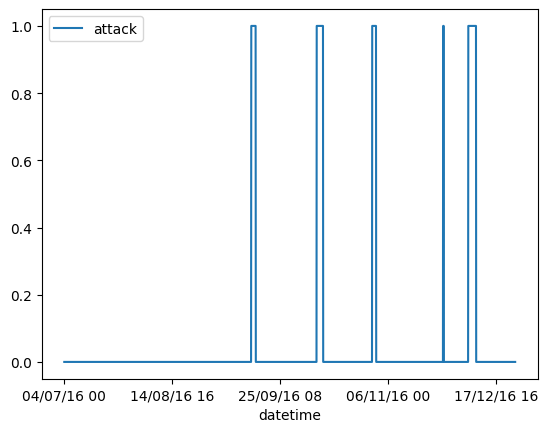

In [14]:
test_df.plot(y="attack")

In [15]:
main._loadBestModel()
avg_loss, [test_predicted_list, test_ground_list, test_labels_list]=test(main.model,main.test_dataloader)


d:\thesis\GDN\main.py:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(open(self.env_config["save_path"] + "/best.pt", "rb"))


In [16]:
n=np.array([test_predicted_list, test_ground_list, test_labels_list])
result=pd.DataFrame({
    "pred":n[1,:,-1],
    "ground":n[2,:,-1],
})

<Axes: >

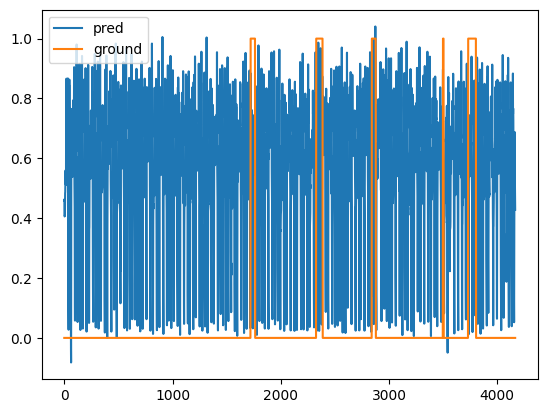

In [17]:
result.plot()